In [30]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


# Classification Metrices

In [31]:
Classification_data = pd.read_csv('Classfication.csv')

In [32]:
Classification_data.head()

,y_test,y_pred,y_pred_prob_class1
0,0,0,0.043126
1,0,0,0.131228
2,1,0,0.211326
3,0,0,0.138208
4,0,0,0.044709


In [33]:
y_test = Classification_data['y_test']
y_pred = Classification_data['y_pred']
y_pred_prob_class1 = Classification_data['y_pred_prob_class1']

## Task:
** To form a confusion matrix from these results and derive metrics from it. **

In [34]:
## importing necessary libraries

from sklearn.metrics import confusion_matrix

#### Form a confusion matrix (actuals/predictions on horizontal/vertical axis respectively)

In [35]:
# forming confusion matrix (actuals/predictions on horizontal/vertical axis respectively)
cf = confusion_matrix(y_test,y_pred)
print(cf)

[[109  16]
 [ 33  34]]


Q: __What is the size of Confusion Matrix?__

Choose only ONE best answer.
* A: (2,2)
* B: (3,3)
* C: (4,4)
* D: (1,1)


Ans: A


#### Extract True Positive, True Negative, False Positive, False Negative

In [36]:
## Extract True Positive, True Negative, False Positive, False Negative
## Note that all these values are corresponding to class 1

#true positive
tp = cf[1,1]

#false positive
fp = cf[1,0]

#true negative
tn = cf[0,0]

#false negative
fn = cf[0,1]

print(tp,fp,tn,fn)

34 33 109 16


Q: __Arrange the following in descending order__

TP, FP, TN, FN

Choose only ONE best answer.

* A: A,B,C,D
* B: C,A,B,D
* C: A,C,D,B
* D: C,D,A,B

Ans : B


#### Calculate Precision, Recall and f1 score

In [38]:
## Calculate Precision
precision = tp/(tp+fp)

## Calculate Recall
recall = tp/(tp+fn)

## Calculate f1 score
f1 = 2/((1/precision)+(1/recall))

precision, recall, f1

(0.5074626865671642, 0.68, 0.5811965811965812)

Q: __What are the values of Precision, Recall, and F1 score?__

Choose only ONE best answer.
* A: Precision = 0.50, Recall = 0.58, F1 score = 0.68
* B: Precision = 0.58, Recall = 0.50, F1 score = 0.68
* C: Precision = 0.68, Recall = 0.58, F1 score = 0.50
* D: Precision = 0.50, Recall = 0.68, F1 score = 0.58

Ans : D


## Task:
** To draw a ROC Curve and get insights from it **

#### Fill the right entries for building ROC Curve

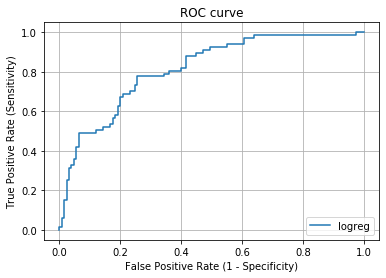

In [39]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_class1)

plt.plot(fpr, tpr, label="logreg")
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

#### Define a function that accepts a threshold and prints sensitivity and specificity?

In [40]:
def evaluate_threshold(tpr, fpr,clf_threshold, threshold):
    print('Sensitivity:', tpr[clf_threshold > threshold][-1])
    print('Specificity:', 1 - fpr[clf_threshold > threshold][-1])
    
evaluate_threshold(tpr, fpr, thresholds, 0.2)

Sensitivity: 0.8805970149253731
Specificity: 0.5840000000000001


#### Find out ROC_AUC score.

In [41]:
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob_class1)
print(roc_auc)

0.8132537313432836


Q: __What is the ROC_AUC Score?__

__Choose only ONE best answer.__

* A: 0.51
* B: 0.61
* C: 0.71
* D: 0.81

Ans : D


## Task:
** To draw a Precision Recall Curve and get insights from it **

In [12]:
from sklearn.metrics import precision_recall_curve

### Fill the right entries for building Precision Recall Curve

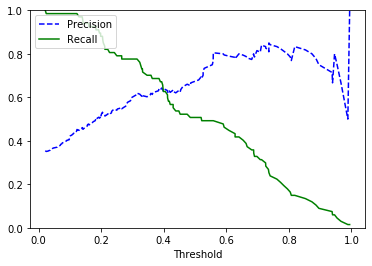

In [13]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob_class1)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

#### Find out the Precision and Recall at 0.4 threshold

In [14]:
from sklearn.metrics import precision_score, recall_score

y_pred_new = (y_pred_prob_class1 > 0.4)

precisionScore = precision_score(y_test, y_pred_new)
recallScore = recall_score(y_test, y_pred_new)
precisionScore, recallScore

(0.6363636363636364, 0.6268656716417911)

Q: __Select the correct statement?__

__Choose only ONE best answer.__
* A: Precision is more than Recall at 0.4 threshold.
* B: Precision is Less than Recall at 0.4 threshold.
* C: Precision is equal to Recall at 0.4 threshold.

Ans : A